In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


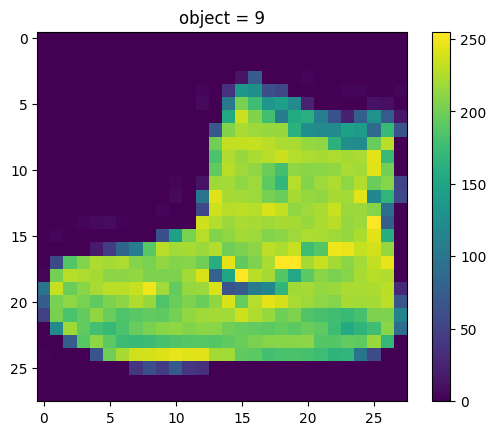

In [ ]:
plt.imshow(xtrain[0])
plt.title(f"object = {ytrain[0]}")
plt.colorbar()

In [ ]:
xtrain[0].shape

(28, 28)

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
label_to_remove = 8
def remove_label(X, y, label):
    mask = y != label  # Create a mask where the label is not equal to the target label
    return X[mask], y[mask]

# Remove class 8 from both training and testing datasets
xtrain, ytrain = remove_label(xtrain, ytrain, label_to_remove)
xtest, ytest = remove_label(xtest, ytest, label_to_remove)


In [ ]:
label_to_remove = 6
def remove_label(X, y, label):
    mask = y != label  # Create a mask where the label is not equal to the target label
    return X[mask], y[mask]

# Remove class 8 from both training and testing datasets
xtrain, ytrain = remove_label(xtrain, ytrain, label_to_remove)
xtest, ytest = remove_label(xtest, ytest, label_to_remove)


In [ ]:
class_images = {}
for img, label in zip(xtrain, ytrain):
    if label not in class_images:
        class_images[label] = img
    if len(class_images) == 10:  # Stop when we have all 10 classes
        break

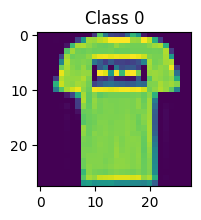

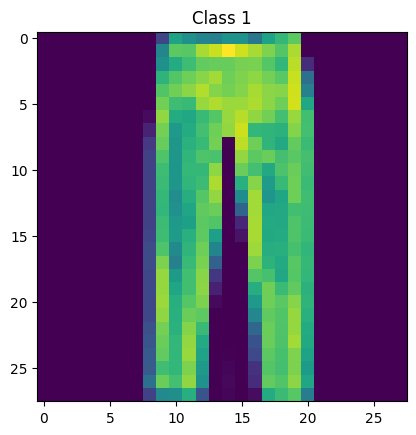

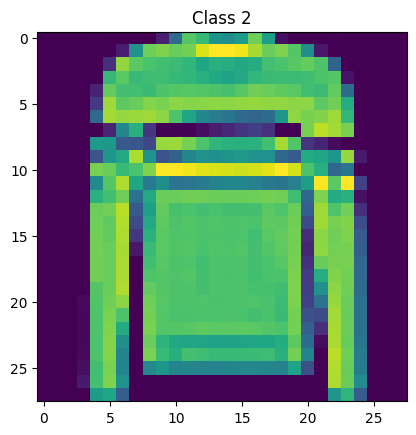

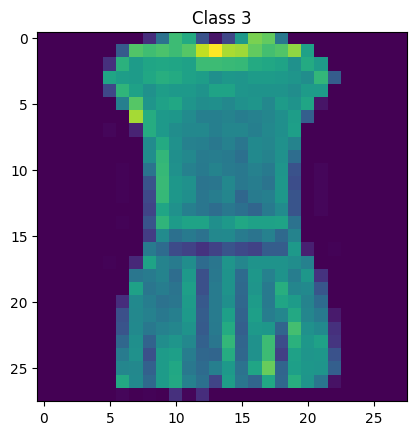

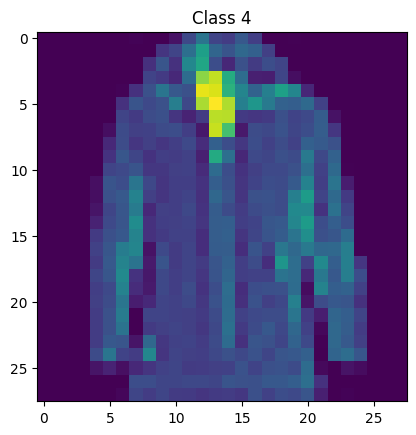

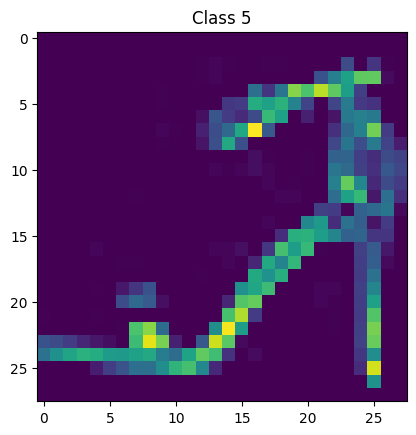

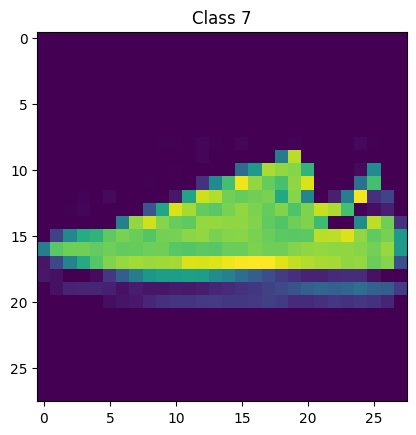

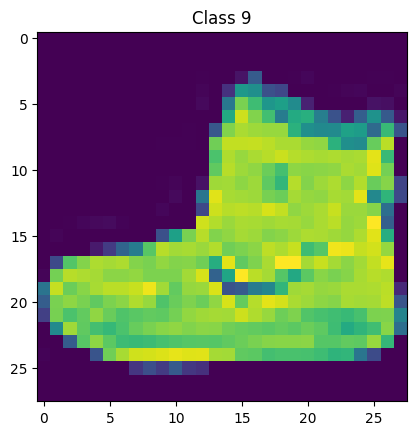

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(10):
    if i in class_images:
      plt.imshow(class_images[i])
      plt.title(f"Class {i}")
      plt.show()

NORMALIZATION

In [ ]:
xtrain,xtest = xtrain/255,xtest/255

NEURAL NETWORKS USING TENSORFLOW ANS KERAS.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = (28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model.compile(optimizer = 'adam', metrics = ['accuracy'],loss = "sparse_categorical_crossentropy")
model.fit(xtrain,ytrain,epochs = 20,verbose = 1)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8401 - loss: 0.4638
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9057 - loss: 0.2652
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9188 - loss: 0.2262
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9272 - loss: 0.2055
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9299 - loss: 0.1968
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9378 - loss: 0.1730
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9379 - loss: 0.1684
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9402 - loss: 0.1620
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9431 - loss: 0.1527
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9460 - loss: 0.1449
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9484 - loss: 0.1395
Epoch 12/20
1500/1500 ━━━━━━━━

In [ ]:
loss , accuracy = model.evaluate(xtest,ytest)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9290 - loss: 0.2425


CLASSIFICATION REPORT ON TEST DATA

In [17]:
y_pred = model.predict(xtest)
y_pred_classes = y_pred.argmax(axis=1)
print(classification_report(ytest, y_pred_classes))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.89      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.86      0.84      0.85      1000
           5       0.98      0.97      0.98      1000
           7       0.95      0.97      0.96      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000



In [ ]:
np.argmax(model.predict(xtest)[0])

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


9

TEST WITH ANY NEW IMAGE

In [ ]:
test_image = tf.keras.preprocessing.image.load_img("NEW_IMAGE_PATH")
test_image = tf.image.rgb_to_grayscale(test_image)
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = tf.image.resize(test_image,[28,28])
test_image = test_image.numpy().squeeze()
test_image = test_image.astype("float64")
plt.imshow(test_image)
test_image = test_image.reshape(1,28,28)
test_image = test_image/255
plt.title(f"ID = {np.argmax(model.predict(test_image))}")